<a href="https://colab.research.google.com/github/datawithyadu/DSS-Project-UE/blob/main/House_Price_Prediction_XG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Prices Prediction using ML models
## Project Overview
The pricing of a house influenced by many factors such as the construction quality, House age, meterials used, and size etc.
Our goal is to build a machine learning model that can predict house price accurately which could help the audiance such as
  - Home Buyers
    - Individuals those are looking for a house with fair price.
  - Real estate dealers
    - Dealers who can view and acess the property value.
  - Construction companies
    - Companies can plan the housing counstruction based on what feature add most value.

##  Data Source
  - The Ames Housing dataset used here for this project
  - https://www.kaggle.com/competitions/home-data-for-ml-course/overview
## Problem statement
  - The objective of this project is to develop a robust model that capable to predict the "Sale Price" of a house based on it's various features. The Problem is a Supervised learning regression problem since the target variable is "sales price" and it is numerical.
## ML Approach
  - Implimented the following Machine learning techniques for obtaining best results from the building model.
    - Random forest regressor
      - Since the dataset contains many independent variables (79 features), identifying which features matter most for accurate predictions is difficult to do manually. Therefore, a Random Forest Regressor is used. This algorithm builds multiple decision trees and averages their predictions to produce a more reliable result. Random Forest is also resistant to overfitting because it doesn't rely on a single decision tree; instead, each tree learns from a slightly different subset of the data and looks at a random selection of features. This prevents all trees from learning the same mistakes, making the final model more stable and general. Additionally, Random Forest provides feature-importance insights by showing how much each feature contributes to reducing prediction error across all the trees.
    - XG Boost
      - XGBoost works differently from Random Forest. Instead of training many trees independently, XGBoost builds trees sequentially, where each new tree learns from the errors made by the previous trees. This process called boosting which allows the model to continuously correct its mistakes, becoming more refined with each iteration. As a result, XGBoost often achieves higher accuracy, especially on structured/tabular data.

## Expected Result
  - This ML project will walk through the complete machine learning pipeline required to a high quality model which can predict the "Sale price" of the house.
  By end of the project we aim to:
    - Identify which features drive the house price
    - Build accurate predictive model
    - Creating Kaggle submission file which meets the criteria

## Importing Required Libraries
  - In this section we import all the python libraries which are essential for Loading the data, Preprocessing techniques, Visualization,  feature engineering, and finally building the model.

In [ ]:
# Import necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from IPython.display import FileLink
from google.colab import files

from sklearn.neighbors import KNeighborsRegressor

## Loading the Dataset
  - In this step we load the dataset provided by the kaggle competition. By loading and viewing the dataset we can begin the exploratory data analysis (EDA).

In [ ]:
# Read the dataset (train dataset)
df = pd.read_csv("train.csv")
# Viewing the loaded dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Define feature and target variables
As part of the exploratory data analysis (EDA), we define the independent variables (features) and the dependent variable (target).

 - The independent variables (x) represent the features that describe the characteristics of a house, such as size, quality, and location.

- The dependent variable (y) is the target variable, which represents the sale price of the house (SalePrice).

Separating features and the target variable is a crucial step before applying machine learning models. So that the models can learn from the relationship between the input variables and predicted outcome.

In [ ]:
df = df.drop("Id", axis=1)
x = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
print(f"Features (x): {x.shape}")
print(f"Target (y): {y.shape}")

Features (x): (1460, 79)
Target (y): (1460,)


# Split the dataset on data types
For ease of preprocessing and to apply appropriate imputation and encoding techniques, we separate the dataset into numerical and categorical features.

 - Numerical features (num_cols) contain continuous or discrete numeric values and typically require imputation using statistical methods such as mean or median.

 - Categorical features (cat_cols) contain non-numeric values and usually require imputation using the most frequent value and encoding techniques such as one-hot encoding.

This separation ensures that each feature type is handled using the most suitable preprocessing strategy.

In [ ]:
# Separate numerical and categorical columns
num_cols = x.select_dtypes(include=['int64', 'float64']).columns
cat_cols = x.select_dtypes(include=['object', 'category']).columns

# Imputing missing values in numerical features
 - Numerical features may also contain missing values that must be handled before training the machine learning model.
In this step, missing values in numerical columns are replaced using SimpleImputer, typically with the mean or median of each feature.This approach is chosen because the dataset contains many numerical features with missing values across different columns, and our primary goal is to replace them using a reliable and efficient method. More complex imputation techniques such as KNN Imputer or model-based imputation are not used, as they can be time-consuming, increase computational complexity, and may not significantly improve model performance for this dataset. SimpleImputer provides a fast, stable, and effective solution, making it well-suited for large tabular datasets like housing price data.




In [ ]:
# Impute numerical columns with mean
imputer_num = SimpleImputer(strategy='mean')
x[num_cols] = imputer_num.fit_transform(df[num_cols])

# Imputing missing values in categorical features
 - The categorical features also may contain missing values that bust be handle before applying encoding techniques.
 In the below step we are replacing the missing values in categorical columns and replacing it with most frequent categories in each feature.

In [ ]:
# Impute categorical columns with most frequent
imputer_cat = SimpleImputer(strategy='most_frequent')
x[cat_cols] = imputer_cat.fit_transform(x[cat_cols])

# Check the null values using heatmap

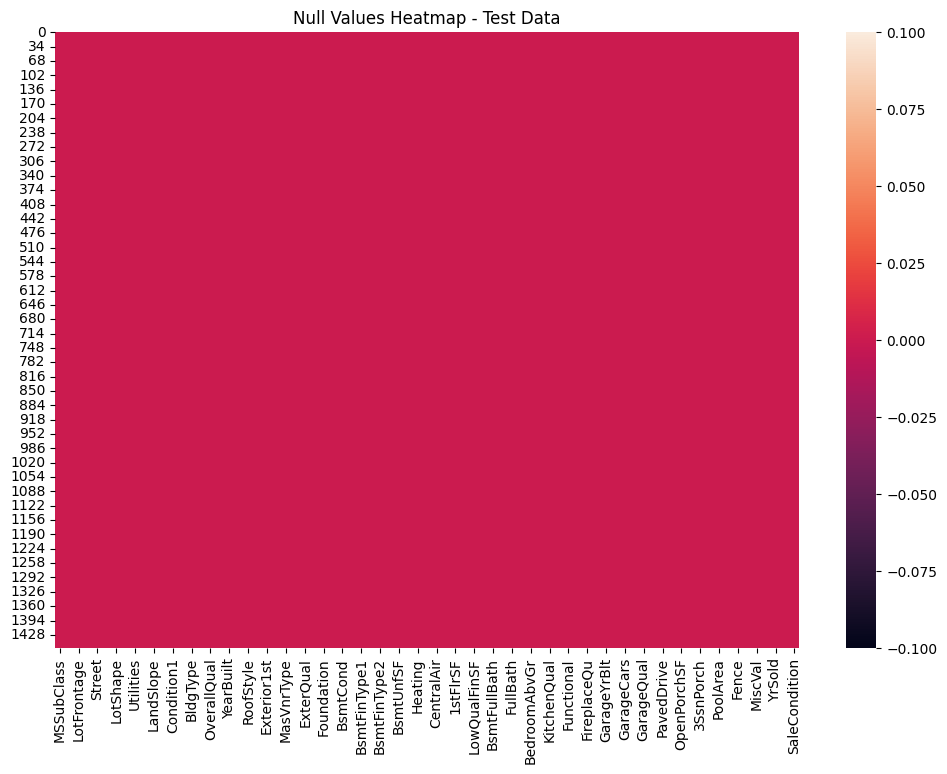

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(x.isnull())
plt.title("Null Values Heatmap - Test Data")
plt.show()

# Applying ColumnTransformer
 - Machine learning models cannot directly process categorical features, so these features must be converted into numerical format before training. In this step, "ColumnTransformer" is used to apply "OneHotEncoder" to categorical features while allowing numerical features to pass through unchanged. This approach ensures that different feature types are handled appropriately within a single, structured preprocessing step, making the data fully compatible with machine learning models.

In [ ]:
ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)],remainder='passthrough')
x_encoded = ct.fit_transform(x)

# Extracting features after encoding
 - After applying onehotencoder, each categorical features is changed to multiple new binary columns. because of this, it is very important to keep track of what each columns actually represents because once we imppliment the onehot_encoder the original name won't visible which could make difficulty to understand the data.
  - It helps us to understand what actually the model learning and on which feature the model gives more priority.
  - It helps us to make our interpretation easier rather than seeing numbers without context.

In [ ]:
ohe = ct.named_transformers_['onehot']
ohe_features = ohe.get_feature_names_out(cat_cols)
all_features = list(ohe_features) + list(num_cols)

# Applying Mutual Information (MI) Score for Feature Relevance
 - Since the dataset contains 79 feature variables for predicting the house sale price, it is important to understand whether all features contribute meaningfully to the prediction task. In this step, Mutual Information (MI) score is used to evaluate the individual relevance of each feature with respect to the target variable (SalePrice). MI helps identify weak or less informative features by measuring how much information each feature provides about the house price.
# Working of MI
- Mutual Information is a statistical measure that evaluates how much knowing a feature reduces uncertainty about the house price.

Conceptually, MI:
 - Starts with no knowledge about the house price
 - Takes one feature at a time (for example, house size)
 - Observes how changes in that feature affect the distribution of house prices

 - Repeats this process independently for all features

Since categorical features have already been encoded using OneHotEncoder, they are represented in binary form (0 or 1):

 - 1 indicates the presence of a category

 - 0 indicates absence

MI evaluates whether the presence or absence of a feature provides useful information about the house price.

In [ ]:
mi_score = mutual_info_regression(x_encoded, y)
mi_score = pd.Series(mi_score, index=all_features, name="MI Score")
mi_scores = pd.Series(mi_score, index=all_features, name="MI Score").sort_values(ascending=True)
mi_scores.head(10)

,MI Score
MoSold,0.0
Street_Pave,0.0
Street_Grvl,0.0
MiscVal,0.0
Alley_Grvl,0.0
Neighborhood_Blueste,0.0
Neighborhood_SWISU,0.0
SaleCondition_Family,0.0
SaleType_ConLI,0.0
SaleType_Oth,0.0


# Interpretation based on MI score
 - The heatmap above visualizes the Mutual Information (MI) score of features with respect to the target variable (SalePrice). Blue colors indicate features with lower individual impact, while yellow colors represent features with higher MI scores and a stronger relationship with the target variable.Features such as OverallQual, GrLivArea, TotalBsmtSF, and GarageCars show higher MI scores, indicating strong individual relevance in predicting house prices. Many one-hot encoded categorical features display lower MI scores, suggesting that they contribute limited information on their own. However, low MI scores do not mean these features are irrelevant. Such features can become important when combined with other features, which is better captured by models like Random Forest and XGBoost during training.

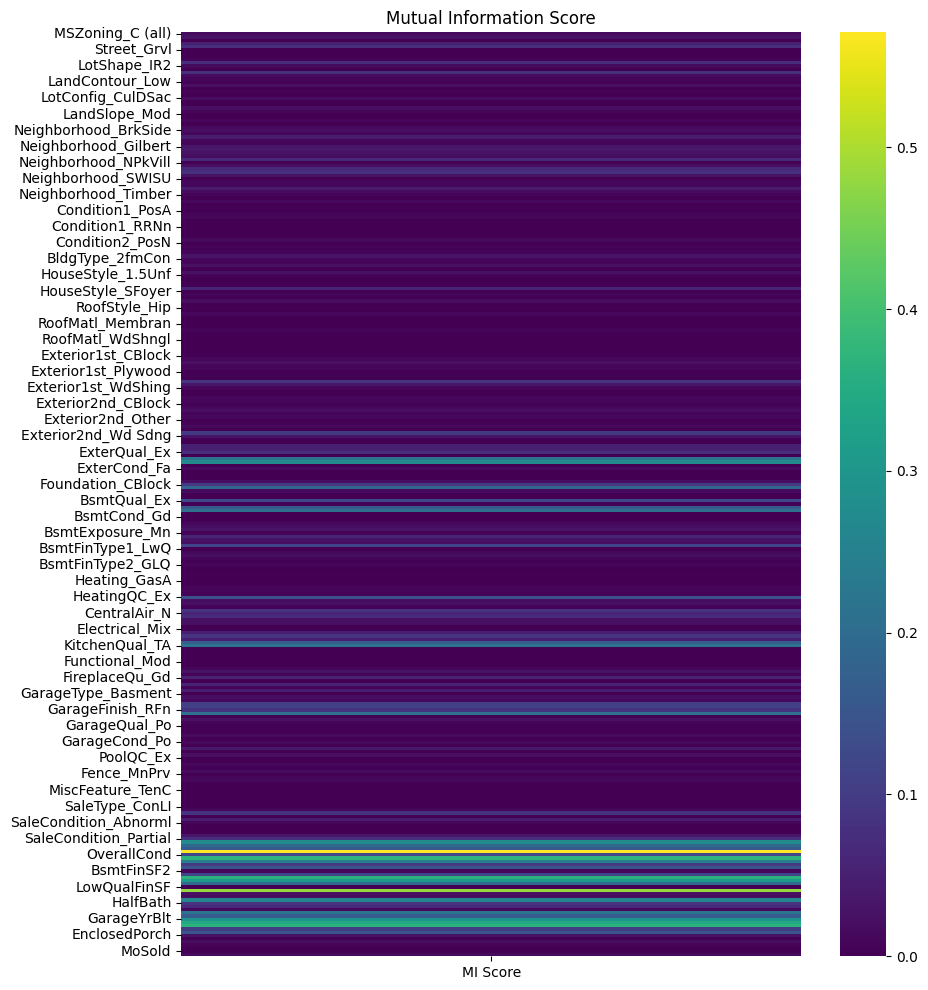

In [ ]:
plt.figure(figsize = (10,12))
sns.heatmap(mi_score.to_frame(), cmap = 'viridis', annot=False)
plt.title("Mutual Information Score")
plt.show()

# Checking for null values
 - At this stage, we revisit the dataset to verify that missing values have been properly handled using the SimpleImputer method during preprocessing. To visually validate the absence of null values, we use a heatmap visualization, where any remaining missing values would be clearly highlighted. This step ensures data completeness and confirms that the dataset is ready for further modeling and evaluation.

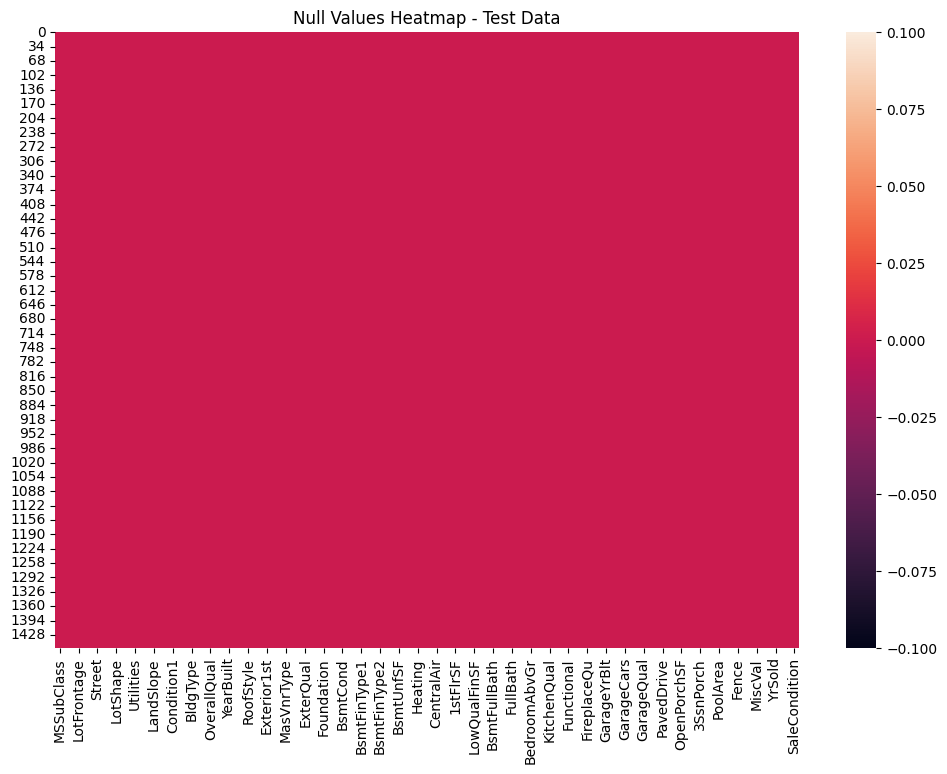

In [ ]:
# Checking the null values in the Dataset
plt.figure(figsize = (12,8))
sns.heatmap(x.isnull())
plt.title("Null Values Heatmap - Test Data")
plt.show()

# Applying train test split
Before training the machine learning model, the dataset is split into training and testing sets.
The training set is used to learn patterns from the data, while the testing set is used to evaluate the model’s performance on unseen data.

 - x_train – Feature values used to train the model

 - y_train – Actual house prices used to teach the model

 - x_test – Feature values not seen during training

 - y_test – Actual house prices used to evaluate predictions

* test_size = 0.2 (80% of the data used for testing)
* random_state = 0 ensures that every time we run the code, the train–test split remains the same. This removes randomness, so the model produces consistent and reproducible results.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=0)


# Verifying Train Test split
 - After splitting the training dataset into training and validation sets, we check the shapes of both datasets to ensure the split was performed correctly and that the feature dimensions remain consistent before model training.

In [ ]:
print(f"Shape of train dataset: ",x_train.shape)
print(f"Shape of test dataset:", x_test.shape)

Shape of train dataset:  (1168, 287)
Shape of test dataset: (292, 287)


# Apply Random forest Regressor
We use RandomForestRegressor because the dataset contains many features, and identifying complex patterns manually is impossible. A single decision tree can work for simple or small feature sets, but when many features are involved, Random Forest gives more accurate and stable results. We use the Regressor version because our target variable (SalePrice) is a numerical value.
 - rf_r -> Trained RandomForestRegressor
 - n_estimator = 200 ->
  Specifies the number of decisions trees in the forest. Using more trees helps the model capture complex patterns and imporoves prediction stability
 - random_state = 0 ->
 This ensure the reproducibility by fixing the random_state, so the model proces the same result at each time its trained.

In [ ]:
rf_r = RandomForestRegressor(n_estimators=200, random_state=42)
rf_r.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

# Predict house prices for the test set

This step uses the trained Random Forest model to predict house prices for the validation (test) dataset. The model applies the patterns it learned during training to unseen data and generates predicted values for the target variable, SalePrice.
 - rf_r -> Trained RandomForestRegressor
 - x_test -> Validation feature (The part not used during training)
 - y_pred -> Predicted house price generated by the model

In [ ]:
y_pred = rf_r.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

# RMSE -  How far the actual values from the predicted values
 RMSE is used to evaluate the performance of the regression model by measuring the average difference between the actual house prices and the predicted prices. It penalizes larger errors more heavily, making it a reliable metric for assessing prediction accuracy.
 Here,  the rmse compares predicted value (y_pred) with actual values (y_test)
  - y_test -> Contain the actual house prices comes from the validation split of train_csv. It represents the true Sales_price for the unseen data.
  - y_pred -> The model predicted price



# Interpretation
The RMSE value is 33,107.24, which means that, on average, the model’s predicted house prices differ from the actual prices by about 33,107 units. The objective of the model is to minimize this error as much as possible, indicating more accurate predictions.

In [ ]:
rmse = mean_squared_error(y_test, y_pred)**0.5
rmse

33107.24965205

# Apply Random forest feature importance
 Random Forest feature importance measures how much each feature contributes to the model’s predictions. During training, the model builds multiple decision trees and selects splits that reduce prediction error the most. Features that are used more frequently in these important splits receive higher importance scores.
  - Higher Importance = Greater role in prediction

In [ ]:
rf_importance = pd.Series(rf_r.feature_importances_,index=all_features).sort_values()
rf_importance

,0
Neighborhood_Blueste,0.000000
MiscFeature_TenC,0.000000
Functional_Sev,0.000000
Condition2_RRAn,0.000000
Condition2_RRNn,0.000000
...,...
GarageCars,0.023493
BsmtFinSF1,0.031203
TotalBsmtSF,0.040642
GrLivArea,0.115489


# Apply XG Boost in Training dataset
XGBoost is applied as an additional regression model to compare its performance with Random Forest. It is a powerful gradient boosting algorithm that builds models sequentially, where each new tree focuses on correcting the errors made by previous trees. This makes XGBoost effective at capturing complex patterns in the data.

The model is trained on the same preprocessed and encoded training data used for Random Forest to ensure a fair comparison. Its performance is evaluated using RMSE on the validation set.

In [ ]:
# Removed redundant train-test split. The split is already performed in cell e10514ba-8d99-49a0-92f0-f184914f581f.

The below step initializes an XGBoost regressor and trains it using the training dataset. The model learns the relationship between the input features (x_train) and the target variable y_train by minimizing prediction errors in an iterative boosting process.

In [ ]:
model = xgb.XGBRegressor()

model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Making prediction with XGBoost model
 - After training the XGBoost model, predictions are generated for both the validation data and the training data.
   - y_pred_xgb -> Predicted house prices for the validation set (x_test), which contains unseen data. These predictions are used to evaluate how well the model generalizes to new data.
   - y_pred_xgb_original -> Predicted house prices for the training set (x_train), which the model has already seen. This is mainly used to compare training and validation performance and to check for overfitting.

In [ ]:
y_pred_xgb = model.predict(x_test)
y_pred_xgb_original = model.predict(x_train)

# xgb on test

In [ ]:
rmse_xgb_initial_test = mean_squared_error(y_test, y_pred_xgb)**0.5
print(f"Initial XGBoost RMSE on test data: {rmse_xgb_initial_test}")


Initial XGBoost RMSE on test data: 32002.990860230548


However, the RMSE of 1,400.68 observed on the training dataset shows that the model predicts house prices extremely well for data it has already seen. The large gap between the training RMSE (1,401) and the validation RMSE (32,003) indicates that the model is overfitting, meaning it has learned training-specific patterns that do not fully generalize to new data.

In [ ]:
rmse_xgb_initial_train = mean_squared_error(y_train, y_pred_xgb_original)**0.5
print(f"Initial XGBoost RMSE on training data: {rmse_xgb_initial_train}")


Initial XGBoost RMSE on training data: 1400.6794333465455


# Find XG Boost feature Importance

Understanding 'xgb_score' (XGBoost Feature Importance)
The xgb_score column in your feature_comparison DataFrame contains the feature importance scores assigned to each feature by the XGBoost model. These scores quantify how much each feature contributes to the model's ability to predict the target variable (SalePrice).

How XGBoost Calculates Feature Importance:

XGBoost, being a gradient boosting algorithm composed of many decision trees, calculates feature importance in a few common ways:

'weight' (or 'frequency'): This is the default type. It measures the number of times a feature is used in a split across all trees in the model. A higher weight means the feature was used more often to make decisions.
'gain': This measures the average gain (reduction in error) achieved by splits that use the feature across all trees. Essentially, how much the model's predictions improved because of that feature. This is often considered a more robust measure than 'weight'.
'cover': This measures the average coverage of splits that use the feature across all trees. Coverage refers to the number of data points affected by a split.
In your case, model.feature_importances_ typically provides the 'gain' type of importance by default (though it can vary slightly based on the library version and specific parameters). This means:

Higher xgb_score: A feature with a higher xgb_score (like 'OverallQual' or 'GarageCars' as seen in your output) indicates that it had a greater impact on reducing the prediction error across the entire XGBoost model. It was frequently chosen for splits, and those splits significantly improved the model's accuracy.
Lower xgb_score: Features with lower scores contribute less to the model's predictive power. A score of 0.000000 means the feature was never used by any tree in the XGBoost model for splitting, suggesting it had no direct impact on the predictions within this particular model configuration.
Why is this important?

Understanding xgb_score helps you:

Identify key drivers: Pinpoint the most influential factors affecting house prices according to the XGBoost model.
Feature Selection: Potentially remove features with very low or zero importance to simplify the model, reduce noise, and speed up training, without significantly impacting performance.
Model Interpretability: Gain insights into how the model makes its decisions, which can be crucial for trust and debugging.

In [ ]:
xgb_importance = pd.Series(model.feature_importances_, index = all_features).sort_values(ascending = False)
xgb_importance

,0
OverallQual,0.424633
Condition2_Norm,0.090274
GarageCars,0.074903
KitchenAbvGr,0.035525
CentralAir_N,0.033392
...,...
BldgType_2fmCon,0.000000
Condition2_RRNn,0.000000
Condition2_RRAn,0.000000
Alley_Pave,0.000000


# Comapring feature importance scores
To better understand the contribution of each feature, we create a comparison table that combines Mutual Information (MI) scores, Random Forest feature importance, and XGBoost feature importance. This consolidated view helps identify features that contribute the least to predicting house prices among the available features.

The table is sorted by Random Forest importance in ascending order to highlight the least influential features.

In [ ]:
feature_comparison = pd.DataFrame({'MI_Score': mi_scores,'RF_Importance': rf_importance, "xgb_score": xgb_importance})
feature_comparison = feature_comparison.sort_values(by='xgb_score', ascending=True)
feature_comparison.head(100)

,MI_Score,RF_Importance,xgb_score
Utilities_NoSeWa,0.004603,3.983823e-08,0.000000
Street_Pave,0.000000,8.495881e-06,0.000000
BsmtFinType2_GLQ,0.007166,1.076515e-05,0.000000
PoolQC_Ex,0.000875,1.364541e-06,0.000000
PoolQC_Fa,0.000000,3.143550e-06,0.000000
...,...,...,...
Neighborhood_Veenker,0.000494,1.238056e-05,0.000036
BsmtFinType2_Unf,0.003107,1.049482e-04,0.000039
BsmtQual_Gd,0.158245,1.914892e-03,0.000043
Exterior2nd_Stone,0.013873,1.744567e-05,0.000043


# Less contributing features
 - Since the XGBoost regressor achieved a lower RMSE compared to other models, its feature importance scores were used for primary feature filtering. Features with an XGBoost importance score of 0.0 were identified as non-contributing, as they were not used in any decision splits during training. These features were removed to reduce dimensionality, eliminate noise, and improve model efficiency without impacting predictive performance.

In [ ]:
xgb_zero_score_features = feature_comparison[feature_comparison['xgb_score'] == 0.0].index.tolist()
print("Features with XGBoost score of 0.0:")
print(xgb_zero_score_features)

Features with XGBoost score of 0.0:
['Utilities_NoSeWa', 'Street_Pave', 'BsmtFinType2_GLQ', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'RoofMatl_ClyTile', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofStyle_Gambrel', 'MasVnrType_BrkCmn', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'GarageType_Basment', 'MiscFeature_TenC', 'CentralAir_Y', 'LandSlope_Mod', 'LandSlope_Sev', 'LotConfig_FR3', 'Heating_OthW', 'Heating_Wall', 'GarageCond_Ex', 'HeatingQC_Po', 'Heating_Floor', 'Heating_GasW', 'GarageCond_TA', 'Heating_Grav', 'GarageQual_Po', 'GarageQual_Ex', 'Exterior2nd_Other', 'Exterior1st_Stone', 'GarageType_2Types', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Foundation_Stone', 'Functional_Sev', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior2nd_AsphShn', 'Exterior2nd_Br

Following this, a list of non-contributing features was identified. Before removing them from the dataset, these features were stored in a separate list named features_drop_from_main to ensure controlled and traceable feature elimination.

In [ ]:
features_to_drop_from_main = [
    'Utilities_NoSeWa', 'Street_Pave', 'BsmtFinType2_GLQ', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'RoofMatl_ClyTile', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofStyle_Gambrel', 'MasVnrType_BrkCmn', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'GarageType_Basment', 'MiscFeature_TenC', 'CentralAir_Y', 'LandSlope_Mod', 'LandSlope_Sev', 'LotConfig_FR3', 'Heating_OthW', 'Heating_Wall', 'GarageCond_Ex', 'HeatingQC_Po', 'Heating_Floor', 'Heating_GasW', 'GarageCond_TA', 'Heating_Grav', 'GarageQual_Po', 'GarageQual_Ex', 'Exterior2nd_Other', 'Exterior1st_Stone', 'GarageType_2Types', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Foundation_Stone', 'Functional_Sev', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'ExterCond_Po', 'ExterQual_Fa', 'Alley_Pave', 'BldgType_2fmCon', 'Exterior1st_CBlock', 'SaleType_Oth', 'BsmtCond_Po', 'RoofStyle_Mansard', 'SaleCondition_Alloca', 'RoofStyle_Shed', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_CWD', 'SaleType_Con'
]

Recalling the zero-importance features identified by the Random Forest model, all features with an RF importance score of 0.0 were extracted. These features were not used in any meaningful splits during training and were therefore considered non-contributing for prediction.

In [ ]:
# Get features with '0' importance from Random forest and XG Boost
rf_zero_importance_features = feature_comparison[feature_comparison['RF_Importance'] == 0.0].index.tolist()

Here, we drop the less important features that are common to both Random Forest and XGBoost models. The final list of features to remove is created by combining the non-contributing features identified from both models and eliminating duplicates to ensure a unified feature set for filtering.

In [ ]:
# Features to drop
features_to_drop = list(set(features_to_drop_from_main + rf_zero_importance_features + xgb_zero_score_features))

Since column names can be identified only when the data is in DataFrame format, we convert the encoded NumPy array back into a DataFrame. This DataFrame contains all feature names, which allows us to drop specific columns by name.

In [ ]:
# Convert x_encoded (numpy array) back to DataFrame to drop columns by name
x_df = pd.DataFrame(x_encoded, columns=all_features)

Now, from the DataFrame x_df, we drop the features listed in features_to_drop, which contain the less important and non-contributing features identified earlier.

In [ ]:
# Drop all identified features in x_encoded
x_filtered_df = x_df.drop(columns=features_to_drop, errors='ignore')

Here, we update the dataset with the remaining features after dropping.

In [ ]:
# Update all_features list to reflect the dropped columns
all_features_filtered = x_filtered_df.columns.tolist()

In [ ]:
# Convert back to numpy array for model training
x_filtered = x_filtered_df.values

# Retraining Models with Filtered Features


In [ ]:
# Split the filtered dataset into training and testing sets
x_train_filtered, x_test_filtered, y_train_filtered, y_test_filtered = train_test_split(x_filtered, y, test_size=0.2, random_state=0)

# Retrain Random Forest Regressor
Now, we retrain the model using the filtered dataset to evaluate how the Random Forest Regressor performs after removing the non-contributing features. Since this step only involves removing selected features and does not change the data values or encoding, no additional transformation is required. Therefore, the filtered data is directly fitted to the model for training and evaluation.

In [ ]:
# Retrain Random Forest Regressor
rf_r_filtered = RandomForestRegressor(n_estimators=200, random_state=0)
rf_r_filtered.fit(x_train_filtered, y_train_filtered)

RandomForestRegressor(n_estimators=200, random_state=0)

After retraining the Random Forest model on the filtered dataset, predictions are generated for the test data. The model’s performance is then evaluated using Root Mean Squared Error (RMSE), which measures the average difference between the predicted house prices and the actual values. A lower RMSE indicates better predictive accuracy after removing non-contributing features.

In [ ]:
y_pred_rf_filtered = rf_r_filtered.predict(x_test_filtered)

rmse_rf_filtered = mean_squared_error(y_test_filtered, y_pred_rf_filtered)**0.5
print(f"\nRandom Forest RMSE with filtered features: {rmse_rf_filtered}")


Random Forest RMSE with filtered features: 34005.371362676735


# Interpretation
The Random Forest RMSE increased slightly from 33,107.25 to 33,238.98 after training on the filtered dataset. This indicates that removing the non-contributing features did not improve the Random Forest model’s performance.

# Retrain XGBoost Regressor

In [ ]:
# Re-initialize the model to ensure it's trained on the new feature set
model_xgb_filtered = xgb.XGBRegressor(
objective='reg:squarederror',n_estimators=200,learning_rate=0.1,max_depth=3,random_state=0)
model_xgb_filtered.fit(x_train_filtered, y_train_filtered)

y_pred_xgb_filtered = model_xgb_filtered.predict(x_test_filtered)
rmse_xgb_filtered = mean_squared_error(y_test_filtered, y_pred_xgb_filtered)**0.5
print(f"XGBoost RMSE with filtered features: {rmse_xgb_filtered}")

XGBoost RMSE with filtered features: 26943.251771083607


In [ ]:
print(f"Original Random Forest RMSE: {rmse}")
print(f"Filtered Random Forest RMSE: {rmse_rf_filtered}")
print(f"\nInitial XGBoost RMSE on test data: {rmse_xgb_initial_test}")
print(f"Filtered XGBoost RMSE: {rmse_xgb_filtered}")


Original Random Forest RMSE: 33107.24965205
Filtered Random Forest RMSE: 34005.371362676735

Initial XGBoost RMSE on test data: 32002.990860230548
Filtered XGBoost RMSE: 26943.251771083607


# Apply Hyperparameter Tuning

When tuning XGBoost, try all these parameter values in different combinations and find the best one.

n_estimators: Number of trees in the model.
More trees improve learning but increase training time and risk overfitting.

learning_rate: Speed at which the model learns.
Lower values give stable learning; higher values may overfit.

max_depth: Maximum depth of each tree.
Controls model complexity; deeper trees can overfit.

In [ ]:
# Grid search CV parameters
grid_para = {
    'n_estimators': [200, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05]
}
grid_para

{'n_estimators': [200, 300], 'max_depth': [3, 5], 'learning_rate': [0.05]}

Here we have cross validation saet as 3, which means that the dataet has splitted into 3 folds. the model will be then trained 3 times, each time using a different fold as the validation set and the remaining two folds as the training set.

In [ ]:
cv = 3

This code initializes a fast and reproducible XGBoost regression model prepared for hyperparameter tuning and training.
objective='reg:squarederror


In [ ]:
model = xgb.XGBRegressor(
    objective='reg:squarederror', # The model should minimize squared error between predicted and actual values
    random_state=0,
    n_estimators=1000,
    tree_method='hist'  # Uses a histogram-based algorithm
)

GridSearchCV is applied to perform hyperparameter tuning for the XGBoost model. It evaluates all parameter combinations defined in param_grid using 3-fold cross-validation and selects the optimal configuration based on the negative mean squared error. Parallel processing is enabled to improve computational efficiency.

In [ ]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=grid_para,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_search.fit(
    x_train_filtered, y_train_filtered,
    eval_set=[(x_train_filtered, y_train_filtered)]
)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[0]	validation_0-rmse:75663.30564
[1]	validation_0-rmse:73035.11825
[2]	validation_0-rmse:70565.38657
[3]	validation_0-rmse:68234.08219
[4]	validation_0-rmse:66003.41820
[5]	validation_0-rmse:63924.08317
[6]	validation_0-rmse:61957.24866
[7]	validation_0-rmse:60077.12265
[8]	validation_0-rmse:58246.70421
[9]	validation_0-rmse:56502.55011
[10]	validation_0-rmse:54888.97457
[11]	validation_0-rmse:53365.29953
[12]	validation_0-rmse:51885.70667
[13]	validation_0-rmse:50456.53027
[14]	validation_0-rmse:49152.45756
[15]	validation_0-rmse:47868.83615
[16]	validation_0-rmse:46672.59807
[17]	validation_0-rmse:45522.35316
[18]	validation_0-rmse:44403.27250
[19]	validation_0-rmse:43285.41033
[20]	validation_0-rmse:42305.61943
[21]	validation_0-rmse:41279.81962
[22]	validation_0-rmse:40381.83007
[23]	validation_0-rmse:39453.46452
[24]	validation_0-rmse:38581.91904
[25]	validation_0-rmse:37735.03759
[26]	validation_0-rmse:36949.85880
[27]	

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=1000,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [3, 5],
                         'n_estimators': [200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

print("\nBest RMSE found by GridSearchCV:")
best_rmse_tuned = (-grid_search.best_score_)**0.5
print(f"{best_rmse_tuned}")

Best parameters found by GridSearchCV:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}

Best RMSE found by GridSearchCV:
27839.09193921382


# Apply the model in test dataset
The test dataset is loaded and the Id column is extracted to preserve the house identifiers for submission. The test data is then transformed using the same preprocessing pipeline applied to the training data to ensure consistency. After transformation, the non-contributing features are removed using the predefined feature list. The filtered test data is passed to the best-performing trained model to generate house price predictions. Finally, the predictions are combined with the corresponding IDs and saved as a CSV submission file.

In [ ]:
test_df  = pd.read_csv("test.csv")
test_ids = test_df["Id"]

This line uses the trained XGBoost model to predict house prices for the filtered test dataset. The predicted values are stored in final_predictions, which will later be used to create the submission file.

Convert to DataFrame and drop non contributing features from the test data

In [ ]:
test_df_num_imputed = imputer_num.transform(test_df[num_cols])
test_df[num_cols] = test_df_num_imputed

Impute categorical columns in test_df

In [ ]:
test_df_cat_imputed = imputer_cat.transform(test_df[cat_cols])
test_df[cat_cols] = test_df_cat_imputed

Apply column transformer to  test_df

In [ ]:
x_final_encoded = ct.transform(test_df.drop("Id", axis=1))

Convert to dataframe for eliminating the non contributing features from the test data

In [ ]:
x_final_df = pd.DataFrame(x_final_encoded, columns=all_features)

Droping all the non contributing fearures from the test dataset

In [ ]:
x_final_filtered_df = x_final_df.drop(columns=features_to_drop, errors='ignore')

Convert it back to the dataframe to numpy array

In [ ]:
x_final_filtered = x_final_filtered_df.values

Applying the best estimator that we found from the GridSearchCV

In [ ]:
best_xgb_model = grid_search.best_estimator_

Make the best prediction on the filtered and finalized test dataset using the best model parameters defined fromn GridSearchCV

In [ ]:
final_predictions_tuned = best_xgb_model.predict(x_final_filtered)

In [ ]:
# Create submission DataFrame
submission_tuned = pd.DataFrame({"Id": test_ids,"SalePrice": final_predictions_tuned})
submission_tuned.to_csv("submission_tuned.csv", index=False)
print("\nSubmission file for Housing price prediction (tuned features)")
display(submission_tuned.head())
FileLink("submission_tuned.csv")


Submission file for Housing price prediction (tuned features)


,Id,SalePrice
0,1461,122173.531250
1,1462,164676.625000
2,1463,180711.671875
3,1464,186019.546875
4,1465,199573.093750


/content/submission_tuned.csv

In [ ]:
files.download("submission_tuned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>